In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
# Load iris
df = pd.read_csv('iris_dataset_missing.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor


### Detecting null values in each columns & data cleaning

Because 36 rows of data consists null values and they are roughly 15% of total data number. In order to not scew the data set it's safe to drop these rows instead of replacing with approximations.

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    8
petal_width     0
species         0
dtype: int64

In [5]:
df.size

525

In [6]:
df=df.dropna()

In [7]:
df.size

465

In [8]:
df['species'].value_counts()

Iris-virginica     31
Iris-versicolor    31
Iris-setosa        31
Name: species, dtype: int64

## Z-score Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
df_z = df.copy()
std_scaler = StandardScaler()
df_z.iloc[:,[0,1,2,3]] = std_scaler.fit_transform(df_z.iloc[:,[0,1,2,3]])
df_z.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.927166,-1.250832,-0.438543,-0.056882,Iris-versicolor
1,0.515654,-2.149316,0.407371,0.258210,Iris-versicolor
2,-0.687802,1.737310,-1.297410,-1.031796,Iris-setosa
3,0.909646,0.335775,1.097527,1.460566,Iris-virginica
4,-0.307233,-0.861985,0.149660,0.201982,Iris-versicolor


## Min-Max Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
df_minmax= df.copy()
minmax_scaler = MinMaxScaler()
df_minmax.iloc[:,[0,1,2,3]] = minmax_scaler.fit_transform(df_minmax.iloc[:,[0,1,2,3]])
df_minmax.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.203115,0.244092,0.346084,0.462421,Iris-versicolor
1,0.574092,0.073581,0.611799,0.555392,Iris-versicolor
2,0.264660,0.811173,0.076301,0.174764,Iris-setosa
3,0.675395,0.545194,0.828588,0.910157,Iris-virginica
4,0.362512,0.317886,0.530848,0.538801,Iris-versicolor


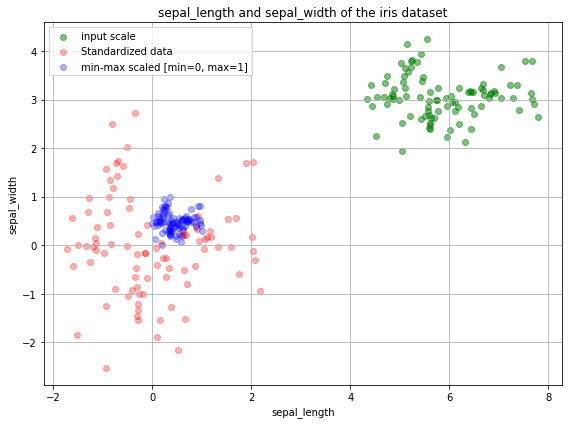

In [11]:
# matplotlib 
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['sepal_length'], df['sepal_width'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_z['sepal_length'], df_z['sepal_width'], color='red',
            label='Standardized data', alpha=0.3)

    plt.scatter(df_minmax['sepal_length'], df_minmax['sepal_width'],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('sepal_length and sepal_width of the iris dataset')
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

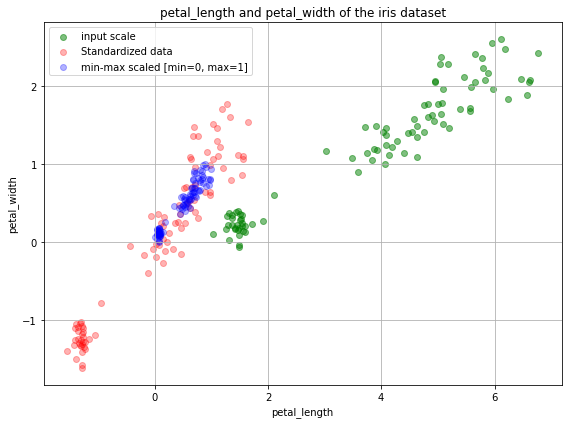

In [12]:
# matplotlib 
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['petal_length'], df['petal_width'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_z['petal_length'], df_z['petal_width'], color='red',
            label='Standardized data', alpha=0.3)

    plt.scatter(df_minmax['petal_length'], df_minmax['petal_width'],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('petal_length and petal_width of the iris dataset')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

## Pair plot

### Pair plot using raw data

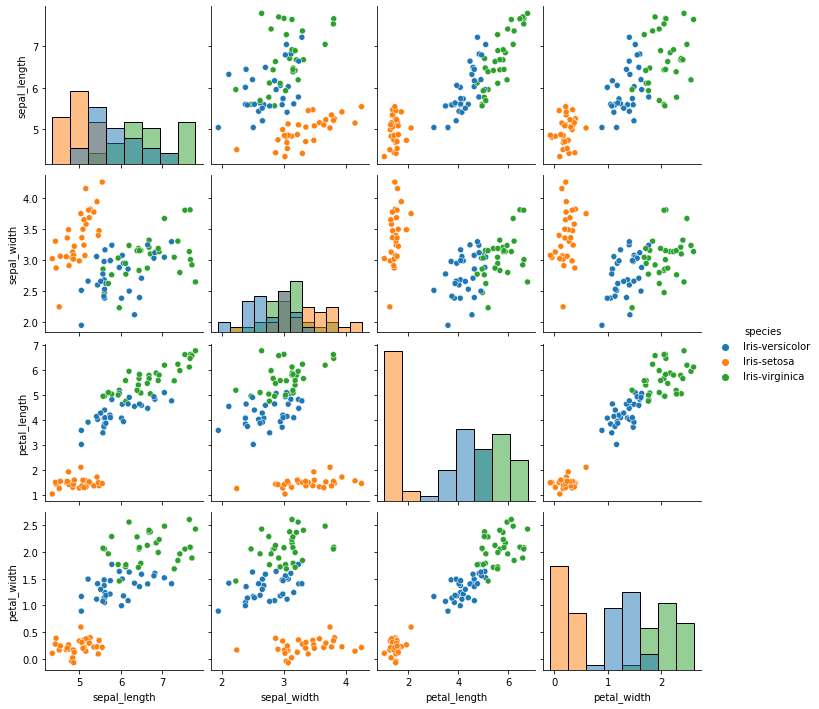

In [13]:
g=sns.pairplot(df, hue='species',diag_kind='hist')

In [14]:
# g=sns.pairplot(df, hue='species',markers=['o','s','D'])

### Visualize correlation using seaborn 

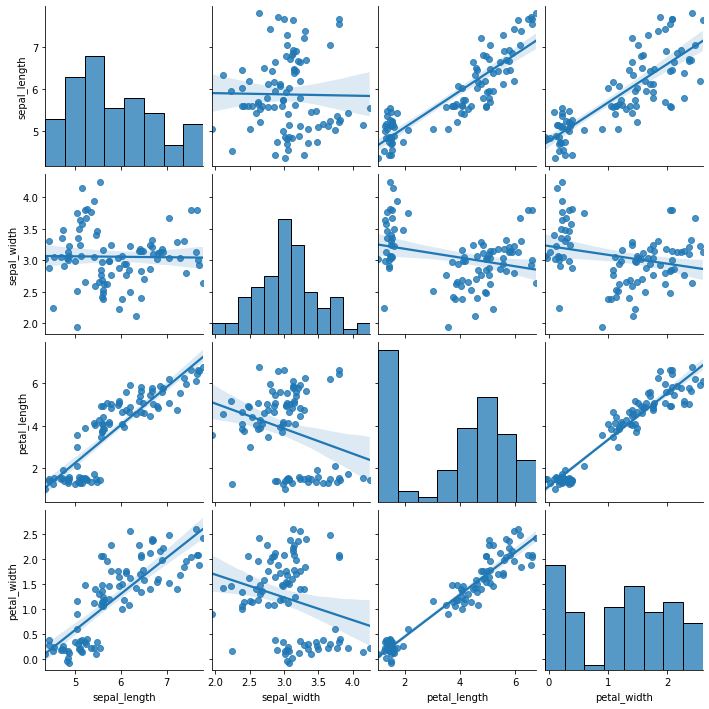

In [15]:
g=sns.pairplot(df,kind='reg')

In [16]:
# g=sns.pairplot(df,x_vars=['sepal_width','sepal_length'],y_vars=['petal_width','petal_length'])

### Pair plot using min-max normalized data

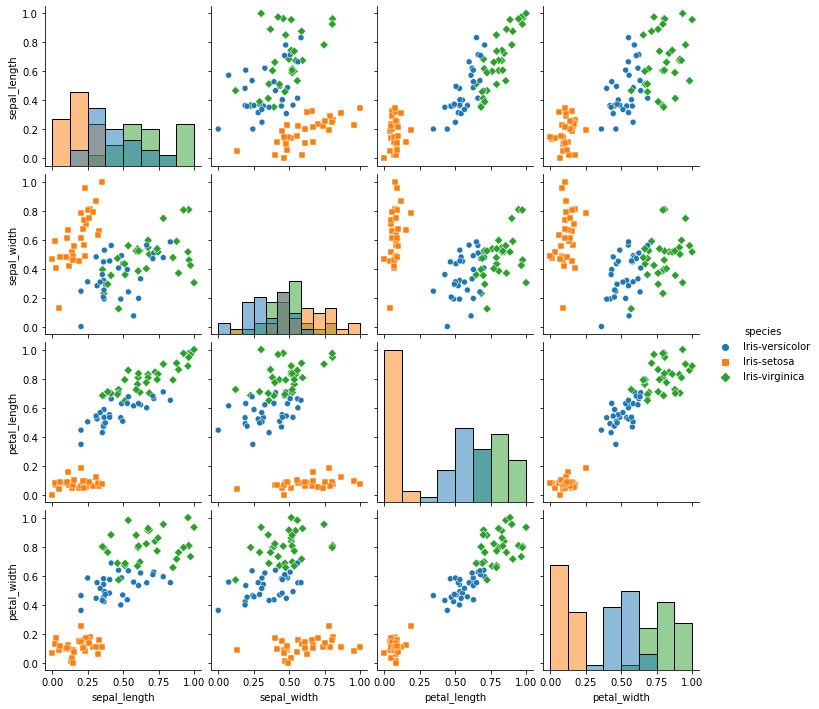

In [17]:
g=sns.pairplot(df_minmax, hue='species',diag_kind='hist',markers=['o','s','D'])

### pair plot using z-score normalized data

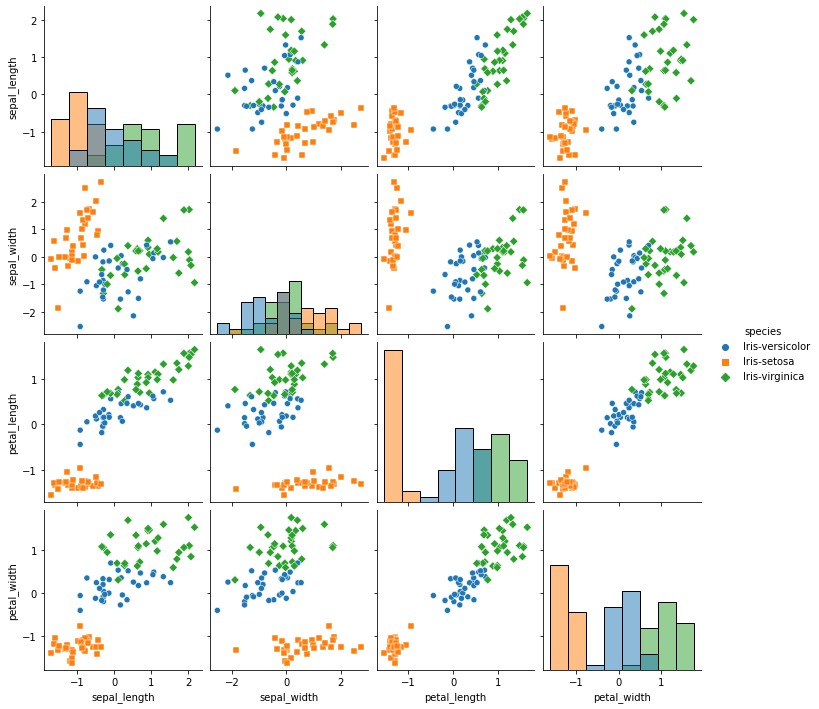

In [18]:
g=sns.pairplot(df_z, hue='species',diag_kind='hist',markers=['o','s','D'])

### Finding correlation r

In [19]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.014750,0.879809,0.813983
sepal_width,-0.014750,1.000000,-0.285793,-0.252136
petal_length,0.879809,-0.285793,1.000000,0.958429
petal_width,0.813983,-0.252136,0.958429,1.000000


#### From the seaborn plot above and correlation table, it is clear that petal_length and sepal_length , petal_width and sepal_length , petal_length and petal_width are strongly correlated (r>0.7). Other feature pairs are not or very weakly correlated (r<0.3).

## Calculate mean, variance, skew and kurtosis

In [20]:
variance= df.var()
print('Variance is:')
variance


Variance is:


sepal_length    0.796147
sepal_width     0.193128
petal_length    3.281167
petal_width     0.629890
dtype: float64

In [21]:
mean =df.mean()
print('Mean is: ')
mean

Mean is: 


sepal_length    5.867894
sepal_width     3.054935
petal_length    3.808118
petal_width     1.209826
dtype: float64

In [22]:
skewness = df.skew()
print('Skewness is: ')
skewness

Skewness is: 


sepal_length    0.424681
sepal_width     0.186780
petal_length   -0.238250
petal_width    -0.101132
dtype: float64

In [23]:
kurt=df.kurt()
print('Kurtosis is: ')
kurt

Kurtosis is: 


sepal_length   -0.677755
sepal_width     0.326975
petal_length   -1.412103
petal_width    -1.319590
dtype: float64

#### A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

## KNN

In [24]:
# drop nan value from table
df_clean= df_z.dropna(how='any')
y =df_clean.iloc[:,-1]
x = df_clean.iloc[:,:4]
y.head()

0    Iris-versicolor
1    Iris-versicolor
2        Iris-setosa
3     Iris-virginica
4    Iris-versicolor
Name: species, dtype: object

In [25]:
# split into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state =98)


In [26]:
# Training and Predicting using default parameter
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

## [CM4] Accuracy

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
acc= accuracy_score(y_test,y_predict)
acc

1.0

With the default parameters, accuracy obtained is 1

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        19
      macro avg       1.00      1.00      1.00        19
   weighted avg       1.00      1.00      1.00        19



## Tuning K using train-validate-test

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state =98)

# further split training set into train and validation set
x_train2, x_cv, y_train2, y_cv = train_test_split(x_train,y_train,test_size = 0.1,train_size =0.9,random_state=98)

k_vals= [1, 5, 10, 15, 20, 25, 30, 35]
accuracy_list=[]

for i in k_vals:
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(x_train2,y_train2)
    y_predict = knnmodel.predict(x_cv)
    accuracy_list.append(accuracy_score(y_cv,y_predict))



In [64]:
accuracy_list

[0.875, 1.0, 0.875, 0.875, 0.875, 0.875, 0.75, 0.75]

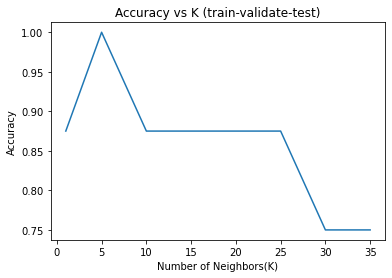

In [65]:
plt.plot(k_vals,accuracy_list)
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K (train-validate-test)')
plt.show()

From the above plot, k=5 gives the highest accuracy of 1.

## Tuning K using k-fold cross validation method

In [33]:
k_vals= [1, 5, 10, 15, 20, 25, 30, 35]
accuracy_list=[]
variance=[]

for i in k_vals:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn,x,y,cv=5,scoring='accuracy')
    accuracy_list.append(scores.mean())
    variance.append(np.var(scores))

The mean accuracies for k-fold cross validations are:

In [34]:
print(accuracy_list)

[0.9140350877192981, 0.9350877192982455, 0.9146198830409358, 0.9035087719298245, 0.8923976608187134, 0.871345029239766, 0.8818713450292398, 0.8602339181286549]


With variances of:

In [35]:
print(variance)

[0.001790636435142437, 0.0005348654286789098, 0.0029356041175062422, 0.004856195068568106, 0.004440340617625936, 0.002790602236585614, 0.004834307992202728, 0.00732669881331008]


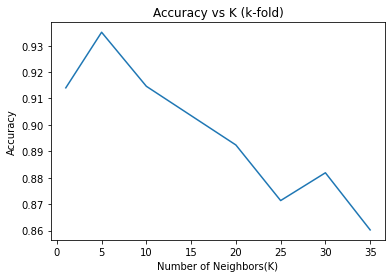

In [36]:
plt.plot(k_vals,accuracy_list)
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K (k-fold)')
plt.show()

From the above plot, k=5 gives the highest accuracy

<strong> Q:Do you find any advantage to one form of validation over the other?</strong>
<p>The <strong>cross-validation method</strong> has the ability to train on multiple train-test splits, therefore the it gives a better insight of the model performance on the entire data. The <strong>train-validate-test</strong> method however only train on one train-test splits and therefore the accuarcy is highly dependent on the <strong>random_state</strong> value.</p>
<p>On the other hand, because <strong>train-validate-test</strong> works like 1-fold cross validation, it's much quicker to compute  than <strong>cross-validation method</strong>  </p>

### [CM6]

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

The accuracy_score is:

In [38]:
accuracy_score(y_test,y_predict)

1.0

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

In [40]:
f1_score(y_test,y_predict,average='macro')

1.0

In [41]:
# from sklearn import LabelEncoder
le =  preprocessing.LabelEncoder()
le.fit(y_train)
y_predict_enc = le.transform(y_predict)
y_test_enc = le.transform(y_test)

In [42]:
y_pred_proba =knnmodel.predict_proba(x_test)

In [43]:
print(roc_auc_score(y_test_enc,y_pred_proba,multi_class='ovr'))

0.9415954415954416


<p> For <strong>iris data set</strong> with <strong> k=5 </strong>, the accuracy score, f-score and AUC are 1, 1, 0.942 respectively </p>

<strong> Q: What was the effect of
changing k? Was the accuracy always affected the same way with an
increase of k? Why do you think this happened?</strong>

<p>For both iris and hear disease data set, increasing k in the begining shows positive effect on accuracy. After the accuracy reached its maximum, it decreases with an increase k<p>

<p> This trend might happen because for low values of K, result can be subbject to the effects of outliers and noise from data and the classifier's decisions will tend to be affected by local changes more easily. On the ohter hand, large k values generates less complex classifier which could over smoothing data features and therefore lows the accuracy </p>

source:https://stats.stackexchange.com/questions/429990/in-the-context-of-knn-why-small-k-generates-complex-models

## [CM 7]

## Train-validate-test

In [44]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state =98)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=98)
x_train.size


296

In [45]:
# further split into train and validation set
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size = 0.1,train_size =0.9,random_state=98)
x_train.size

264

In [46]:
ks= 36
accuracy_list=np.zeros(ks-1)

for i in range(1, ks):
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_predict = knnmodel.predict(x_cv)
    accuracy_list[i-1]= accuracy_score(y_cv,y_predict)


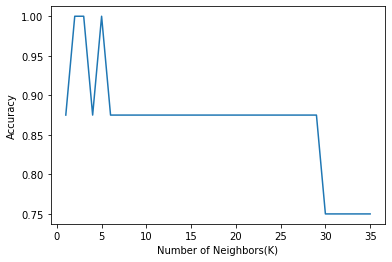

In [47]:
plt.plot(range(1,ks),accuracy_list)
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Accuracy')
plt.show()

In [48]:
accuracy_list


array([0.875, 1.   , 1.   , 0.875, 1.   , 0.875, 0.875, 0.875, 0.875,
       0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875,
       0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875,
       0.875, 0.875, 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 ])

In [49]:
accuracy_list.argmax()+1

2

In [50]:
# pick k =5 because higher k simpler model for knn

In [51]:
knnmodel=KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
y_predict = knnmodel.predict(x_test)

In [52]:
y_test

67        Iris-setosa
44     Iris-virginica
55     Iris-virginica
12        Iris-setosa
88     Iris-virginica
87     Iris-virginica
15     Iris-virginica
98     Iris-virginica
4     Iris-versicolor
86    Iris-versicolor
69    Iris-versicolor
24    Iris-versicolor
48    Iris-versicolor
53     Iris-virginica
56        Iris-setosa
22     Iris-virginica
81     Iris-virginica
5      Iris-virginica
14    Iris-versicolor
Name: species, dtype: object

In [53]:
y_predict

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [54]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score

print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.95        19
      macro avg       0.95      0.97      0.96        19
   weighted avg       0.95      0.95      0.95        19



In [55]:
print(f1_score(y_test, y_predict, average='micro'))

0.9473684210526315


In [56]:
# from sklearn import LabelEncoder
le =  preprocessing.LabelEncoder()
le.fit(y_train)
y_predict_enc = le.transform(y_predict)
y_test_enc = le.transform(y_test)

In [57]:
y_test_enc

array([0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1])

In [58]:
y_predict_enc

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1])

In [59]:
y_pred_proba =knnmodel.predict_proba(x_test)

In [60]:
print(roc_auc_score(y_test_enc,y_pred_proba,multi_class='ovr'))

1.0


In [61]:
y_pred_proba

array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ]])

In [62]:
y_predict_enc

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1])